## 1.Import all required libraries.

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For Data Viz.
import matplotlib.pyplot as plt
import seaborn as sns

#For Warnings
import warnings
warnings.filterwarnings('ignore')

#For Options
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# for termcolor.
from termcolor import colored

# For NLP.
import missingno as msno
import nltk


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [4]:
filename = "/content/drive/MyDrive/glassdoor_reviews.csv"

In [5]:

data_import = pd.read_csv(filename , engine = 'python', encoding='utf-8', error_bad_lines=False)

In [6]:
data_import.head()

firm date_review              job_title  \
0  AFH-Wealth-Management  2015-04-05                          
1  AFH-Wealth-Management  2015-12-11   Office Administrator   
2  AFH-Wealth-Management  2016-01-28   Office Administrator   
3  AFH-Wealth-Management  2016-04-16                          
4  AFH-Wealth-Management  2016-04-23   Office Administrator   

                              current                      location  \
0                    Current Employee                           NaN   
1  Current Employee, more than 1 year  Bromsgrove, England, England   
2  Current Employee, less than 1 year  Bromsgrove, England, England   
3                    Current Employee                           NaN   
4  Current Employee, more than 1 year  Bromsgrove, England, England   

   overall_rating  work_life_balance  culture_values  diversity_inclusion  \
0               2                4.0             3.0                  NaN   
1               2                3.0             1.0                  NaN   
2               1                1.0             1.0                  NaN   
3               5                2.0             3.0                  NaN   
4               1                2.0             1.0                  NaN   

   career_opp  comp_benefits  senior_mgmt recommend ceo_approv outlook  \
0         2.0            3.0          3.0         x          o       r   
1         2.0            1.0          4.0         x          o       r   
2         1.0            1.0          1.0         x          o       x   
3         2.0            2.0          3.0         x          o       r   
4         2.0            1.0          1.0         x          o       x   

                                  headline  \
0  Young colleagues, poor micro management   
1             Excellent staff, poor salary   
2          Low salary, bad micromanagement   
3            Over promised under delivered   
4                   client reporting admin   

                                                pros  \
0  Very friendly and welcoming to new staff. Easy...   
1      Friendly, helpful and hard-working colleagues   
2  Easy to get the job even without experience in...   
3                            Nice staff to work with   
4              Easy to get the job, Nice colleagues.   

                                                cons  
0    Poor salaries, poor training and communication.  
1  Poor salary which doesn't improve much with pr...  
2  Very low salary, poor working conditions, very...  
3           No career progression and salary is poor  
4  Abysmal pay, around minimum wage. No actual tr...

In [7]:
df = data_import.copy()

df = df.set_index('date_review')

In [8]:
df.head()

firm              job_title  \
date_review                                                 
2015-04-05   AFH-Wealth-Management                          
2015-12-11   AFH-Wealth-Management   Office Administrator   
2016-01-28   AFH-Wealth-Management   Office Administrator   
2016-04-16   AFH-Wealth-Management                          
2016-04-23   AFH-Wealth-Management   Office Administrator   

                                        current                      location  \
date_review                                                                     
2015-04-05                     Current Employee                           NaN   
2015-12-11   Current Employee, more than 1 year  Bromsgrove, England, England   
2016-01-28   Current Employee, less than 1 year  Bromsgrove, England, England   
2016-04-16                     Current Employee                           NaN   
2016-04-23   Current Employee, more than 1 year  Bromsgrove, England, England   

             overall_rating  work_life_balance  culture_values  \
date_review                                                      
2015-04-05                2                4.0             3.0   
2015-12-11                2                3.0             1.0   
2016-01-28                1                1.0             1.0   
2016-04-16                5                2.0             3.0   
2016-04-23                1                2.0             1.0   

             diversity_inclusion  career_opp  comp_benefits  senior_mgmt  \
date_review                                                                
2015-04-05                   NaN         2.0            3.0          3.0   
2015-12-11                   NaN         2.0            1.0          4.0   
2016-01-28                   NaN         1.0            1.0          1.0   
2016-04-16                   NaN         2.0            2.0          3.0   
2016-04-23                   NaN         2.0            1.0          1.0   

            recommend ceo_approv outlook  \
date_review                                
2015-04-05          x          o       r   
2015-12-11          x          o       r   
2016-01-28          x          o       x   
2016-04-16          x          o       r   
2016-04-23          x          o       x   

                                            headline  \
date_review                                            
2015-04-05   Young colleagues, poor micro management   
2015-12-11              Excellent staff, poor salary   
2016-01-28           Low salary, bad micromanagement   
2016-04-16             Over promised under delivered   
2016-04-23                    client reporting admin   

                                                          pros  \
date_review                                                      
2015-04-05   Very friendly and welcoming to new staff. Easy...   
2015-12-11       Friendly, helpful and hard-working colleagues   
2016-01-28   Easy to get the job even without experience in...   
2016-04-16                             Nice staff to work with   
2016-04-23               Easy to get the job, Nice colleagues.   

                                                          cons  
date_review                                                     
2015-04-05     Poor salaries, poor training and communication.  
2015-12-11   Poor salary which doesn't improve much with pr...  
2016-01-28   Very low salary, poor working conditions, very...  
2016-04-16            No career progression and salary is poor  
2016-04-23   Abysmal pay, around minimum wage. No actual tr...

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838566 entries, 2015-04-05 to 2021-06-04
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 838566 non-null  object 
 1   job_title            838566 non-null  object 
 2   current              838566 non-null  object 
 3   location             541228 non-null  object 
 4   overall_rating       838566 non-null  int64  
 5   work_life_balance    688672 non-null  float64
 6   culture_values       647193 non-null  float64
 7   diversity_inclusion  136066 non-null  float64
 8   career_opp           691065 non-null  float64
 9   comp_benefits        688484 non-null  float64
 10  senior_mgmt          682690 non-null  float64
 11  recommend            838566 non-null  object 
 12  ceo_approv           838566 non-null  object 
 13  outlook              838566 non-null  object 
 14  headline             836347 non-null  object 
 15  pros     

## Data Cleaning and Manipulation

In [10]:
def missing_vals(df):
    for i in df :
        print(f"{i}:{df[i].isnull().sum()}")

missing_vals(df)

firm:0
job_title:0
current:0
location:297338
overall_rating:0
work_life_balance:149894
culture_values:191373
diversity_inclusion:702500
career_opp:147501
comp_benefits:150082
senior_mgmt:155876
recommend:0
ceo_approv:0
outlook:0
headline:2219
pros:0
cons:8


In [11]:
## Lets drop columns like diversity_inclusion and use because they both have got very large set of missing values.

df1 = df.drop(['diversity_inclusion'],axis = 1)
df1.head()

firm              job_title  \
date_review                                                 
2015-04-05   AFH-Wealth-Management                          
2015-12-11   AFH-Wealth-Management   Office Administrator   
2016-01-28   AFH-Wealth-Management   Office Administrator   
2016-04-16   AFH-Wealth-Management                          
2016-04-23   AFH-Wealth-Management   Office Administrator   

                                        current                      location  \
date_review                                                                     
2015-04-05                     Current Employee                           NaN   
2015-12-11   Current Employee, more than 1 year  Bromsgrove, England, England   
2016-01-28   Current Employee, less than 1 year  Bromsgrove, England, England   
2016-04-16                     Current Employee                           NaN   
2016-04-23   Current Employee, more than 1 year  Bromsgrove, England, England   

             overall_rating  work_life_balance  culture_values  career_opp  \
date_review                                                                  
2015-04-05                2                4.0             3.0         2.0   
2015-12-11                2                3.0             1.0         2.0   
2016-01-28                1                1.0             1.0         1.0   
2016-04-16                5                2.0             3.0         2.0   
2016-04-23                1                2.0             1.0         2.0   

             comp_benefits  senior_mgmt recommend ceo_approv outlook  \
date_review                                                            
2015-04-05             3.0          3.0         x          o       r   
2015-12-11             1.0          4.0         x          o       r   
2016-01-28             1.0          1.0         x          o       x   
2016-04-16             2.0          3.0         x          o       r   
2016-04-23             1.0          1.0         x          o       x   

                                            headline  \
date_review                                            
2015-04-05   Young colleagues, poor micro management   
2015-12-11              Excellent staff, poor salary   
2016-01-28           Low salary, bad micromanagement   
2016-04-16             Over promised under delivered   
2016-04-23                    client reporting admin   

                                                          pros  \
date_review                                                      
2015-04-05   Very friendly and welcoming to new staff. Easy...   
2015-12-11       Friendly, helpful and hard-working colleagues   
2016-01-28   Easy to get the job even without experience in...   
2016-04-16                             Nice staff to work with   
2016-04-23               Easy to get the job, Nice colleagues.   

                                                          cons  
date_review                                                     
2015-04-05     Poor salaries, poor training and communication.  
2015-12-11   Poor salary which doesn't improve much with pr...  
2016-01-28   Very low salary, poor working conditions, very...  
2016-04-16            No career progression and salary is poor  
2016-04-23   Abysmal pay, around minimum wage. No actual tr...

In [12]:
missing_vals(df1)

firm:0
job_title:0
current:0
location:297338
overall_rating:0
work_life_balance:149894
culture_values:191373
career_opp:147501
comp_benefits:150082
senior_mgmt:155876
recommend:0
ceo_approv:0
outlook:0
headline:2219
pros:0
cons:8


In [13]:
def cat_cols(df) :
    o = (df.dtypes == 'object')
    object_cols = o[o].index
    return object_cols

object_cols = cat_cols(df)

cat_cols(df1)

Index(['firm', 'job_title', 'current', 'location', 'recommend', 'ceo_approv',
       'outlook', 'headline', 'pros', 'cons'],
      dtype='object')

In [14]:
## lets do some data cleaning on current column
current_yn = []
def get_number_of_years(df) :

    for i in df1['current']:
        if 'Current' in i :
            current_yn.append(1)
        elif 'Former' in i:
            current_yn.append(0)
        else :
            current_yn.append(0)

    return current_yn

current_yn = get_number_of_years(df1)

In [15]:
df1['Current in Years'] = current_yn

In [16]:
df2 = df1.copy()
df2 = df2.drop('current',axis = 1)

In [17]:
df2.head()

firm              job_title  \
date_review                                                 
2015-04-05   AFH-Wealth-Management                          
2015-12-11   AFH-Wealth-Management   Office Administrator   
2016-01-28   AFH-Wealth-Management   Office Administrator   
2016-04-16   AFH-Wealth-Management                          
2016-04-23   AFH-Wealth-Management   Office Administrator   

                                 location  overall_rating  work_life_balance  \
date_review                                                                    
2015-04-05                            NaN               2                4.0   
2015-12-11   Bromsgrove, England, England               2                3.0   
2016-01-28   Bromsgrove, England, England               1                1.0   
2016-04-16                            NaN               5                2.0   
2016-04-23   Bromsgrove, England, England               1                2.0   

             culture_values  career_opp  comp_benefits  senior_mgmt recommend  \
date_review                                                                     
2015-04-05              3.0         2.0            3.0          3.0         x   
2015-12-11              1.0         2.0            1.0          4.0         x   
2016-01-28              1.0         1.0            1.0          1.0         x   
2016-04-16              3.0         2.0            2.0          3.0         x   
2016-04-23              1.0         2.0            1.0          1.0         x   

            ceo_approv outlook                                 headline  \
date_review                                                               
2015-04-05           o       r  Young colleagues, poor micro management   
2015-12-11           o       r             Excellent staff, poor salary   
2016-01-28           o       x          Low salary, bad micromanagement   
2016-04-16           o       r            Over promised under delivered   
2016-04-23           o       x                   client reporting admin   

                                                          pros  \
date_review                                                      
2015-04-05   Very friendly and welcoming to new staff. Easy...   
2015-12-11       Friendly, helpful and hard-working colleagues   
2016-01-28   Easy to get the job even without experience in...   
2016-04-16                             Nice staff to work with   
2016-04-23               Easy to get the job, Nice colleagues.   

                                                          cons  \
date_review                                                      
2015-04-05     Poor salaries, poor training and communication.   
2015-12-11   Poor salary which doesn't improve much with pr...   
2016-01-28   Very low salary, poor working conditions, very...   
2016-04-16            No career progression and salary is poor   
2016-04-23   Abysmal pay, around minimum wage. No actual tr...   

             Current in Years  
date_review                    
2015-04-05                  1  
2015-12-11                  1  
2016-01-28                  1  
2016-04-16                  1  
2016-04-23                  1

In [18]:
df2 = df2.rename( {'ceo_approv' : 'ceo_approve'} , axis = 1)

<b>
    In columns recommend , coe_approve , outlook. <br>
    Let's add there original values which are , <br>
    v - Positive, r - Mild, x - Negative, o - No opinion <br>
    
 </b>

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838566 entries, 2015-04-05 to 2021-06-04
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   firm               838566 non-null  object 
 1   job_title          838566 non-null  object 
 2   location           541228 non-null  object 
 3   overall_rating     838566 non-null  int64  
 4   work_life_balance  688672 non-null  float64
 5   culture_values     647193 non-null  float64
 6   career_opp         691065 non-null  float64
 7   comp_benefits      688484 non-null  float64
 8   senior_mgmt        682690 non-null  float64
 9   recommend          838566 non-null  object 
 10  ceo_approve        838566 non-null  object 
 11  outlook            838566 non-null  object 
 12  headline           836347 non-null  object 
 13  pros               838566 non-null  object 
 14  cons               838558 non-null  object 
 15  Current in Years   838566 non-null  int64  

In [20]:
df2.replace({
    'x' : 'Negative',
    'v' : 'Positive',
    'r' : 'Mild' ,
    'o' : 'No opinion'
} ,inplace = True)

In [21]:
df2.head()

firm              job_title  \
date_review                                                 
2015-04-05   AFH-Wealth-Management                          
2015-12-11   AFH-Wealth-Management   Office Administrator   
2016-01-28   AFH-Wealth-Management   Office Administrator   
2016-04-16   AFH-Wealth-Management                          
2016-04-23   AFH-Wealth-Management   Office Administrator   

                                 location  overall_rating  work_life_balance  \
date_review                                                                    
2015-04-05                            NaN               2                4.0   
2015-12-11   Bromsgrove, England, England               2                3.0   
2016-01-28   Bromsgrove, England, England               1                1.0   
2016-04-16                            NaN               5                2.0   
2016-04-23   Bromsgrove, England, England               1                2.0   

             culture_values  career_opp  comp_benefits  senior_mgmt recommend  \
date_review                                                                     
2015-04-05              3.0         2.0            3.0          3.0  Negative   
2015-12-11              1.0         2.0            1.0          4.0  Negative   
2016-01-28              1.0         1.0            1.0          1.0  Negative   
2016-04-16              3.0         2.0            2.0          3.0  Negative   
2016-04-23              1.0         2.0            1.0          1.0  Negative   

            ceo_approve   outlook                                 headline  \
date_review                                                                  
2015-04-05   No opinion      Mild  Young colleagues, poor micro management   
2015-12-11   No opinion      Mild             Excellent staff, poor salary   
2016-01-28   No opinion  Negative          Low salary, bad micromanagement   
2016-04-16   No opinion      Mild            Over promised under delivered   
2016-04-23   No opinion  Negative                   client reporting admin   

                                                          pros  \
date_review                                                      
2015-04-05   Very friendly and welcoming to new staff. Easy...   
2015-12-11       Friendly, helpful and hard-working colleagues   
2016-01-28   Easy to get the job even without experience in...   
2016-04-16                             Nice staff to work with   
2016-04-23               Easy to get the job, Nice colleagues.   

                                                          cons  \
date_review                                                      
2015-04-05     Poor salaries, poor training and communication.   
2015-12-11   Poor salary which doesn't improve much with pr...   
2016-01-28   Very low salary, poor working conditions, very...   
2016-04-16            No career progression and salary is poor   
2016-04-23   Abysmal pay, around minimum wage. No actual tr...   

             Current in Years  
date_review                    
2015-04-05                  1  
2015-12-11                  1  
2016-01-28                  1  
2016-04-16                  1  
2016-04-23                  1

## Data Vizualization

In [22]:
data_viz_df = df2.copy()

In [23]:
data_viz_df.head()

firm              job_title  \
date_review                                                 
2015-04-05   AFH-Wealth-Management                          
2015-12-11   AFH-Wealth-Management   Office Administrator   
2016-01-28   AFH-Wealth-Management   Office Administrator   
2016-04-16   AFH-Wealth-Management                          
2016-04-23   AFH-Wealth-Management   Office Administrator   

                                 location  overall_rating  work_life_balance  \
date_review                                                                    
2015-04-05                            NaN               2                4.0   
2015-12-11   Bromsgrove, England, England               2                3.0   
2016-01-28   Bromsgrove, England, England               1                1.0   
2016-04-16                            NaN               5                2.0   
2016-04-23   Bromsgrove, England, England               1                2.0   

             culture_values  career_opp  comp_benefits  senior_mgmt recommend  \
date_review                                                                     
2015-04-05              3.0         2.0            3.0          3.0  Negative   
2015-12-11              1.0         2.0            1.0          4.0  Negative   
2016-01-28              1.0         1.0            1.0          1.0  Negative   
2016-04-16              3.0         2.0            2.0          3.0  Negative   
2016-04-23              1.0         2.0            1.0          1.0  Negative   

            ceo_approve   outlook                                 headline  \
date_review                                                                  
2015-04-05   No opinion      Mild  Young colleagues, poor micro management   
2015-12-11   No opinion      Mild             Excellent staff, poor salary   
2016-01-28   No opinion  Negative          Low salary, bad micromanagement   
2016-04-16   No opinion      Mild            Over promised under delivered   
2016-04-23   No opinion  Negative                   client reporting admin   

                                                          pros  \
date_review                                                      
2015-04-05   Very friendly and welcoming to new staff. Easy...   
2015-12-11       Friendly, helpful and hard-working colleagues   
2016-01-28   Easy to get the job even without experience in...   
2016-04-16                             Nice staff to work with   
2016-04-23               Easy to get the job, Nice colleagues.   

                                                          cons  \
date_review                                                      
2015-04-05     Poor salaries, poor training and communication.   
2015-12-11   Poor salary which doesn't improve much with pr...   
2016-01-28   Very low salary, poor working conditions, very...   
2016-04-16            No career progression and salary is poor   
2016-04-23   Abysmal pay, around minimum wage. No actual tr...   

             Current in Years  
date_review                    
2015-04-05                  1  
2015-12-11                  1  
2016-01-28                  1  
2016-04-16                  1  
2016-04-23                  1

****

In [24]:
# Show an example for each grade
for i in range(1,6):
    tmp = data_viz_df.query('overall_rating==@i').sample(1)
    print(colored(tmp.firm.values[0].upper(),'blue'),'\n'+tmp.headline.values[0],'\nHeadline: ',tmp.headline.values[0],colored('\nPros:','green'),tmp.pros.values[0],colored('\nCons:','red'),tmp.cons.values[0],'\nRating:',colored(tmp.overall_rating.values[0],'red'),'\n')

MCDONALD-S 
tough 
Headline:  tough 
Pros: This was very tough. pros were money 
Cons: cons were working at this place 
Rating: 1 

MCDONALD-S 
Ok 
Headline:  Ok 
Pros: Easy to get hired there 
Cons: Hard physical job. Customer service is tough. 
Rating: 2 

GOLDMAN-SACHS 
Great people - but terrible work life balance 
Headline:  Great people - but terrible work life balance 
Pros: Great benefits, great people. Gym on site, medical centre on site. Expect to work with very clever people who happily share knowledge. 
Cons: Salaries not so high as the media portrays! Dreadful work-life balance - I was often in the office until 3am. 
Rating: 3 

AMERICAN-EXPRESS 
Great place to work! 
Headline:  Great place to work! 
Pros: Excellent compensation, job recognition, benefits, pay raises. American Express values it's employee's and understands a company's success begins with happy employee's, and retaining it's customers. 
Cons: Career development and advancement needs to extend into other are

## Most of the data is review from which firm ?

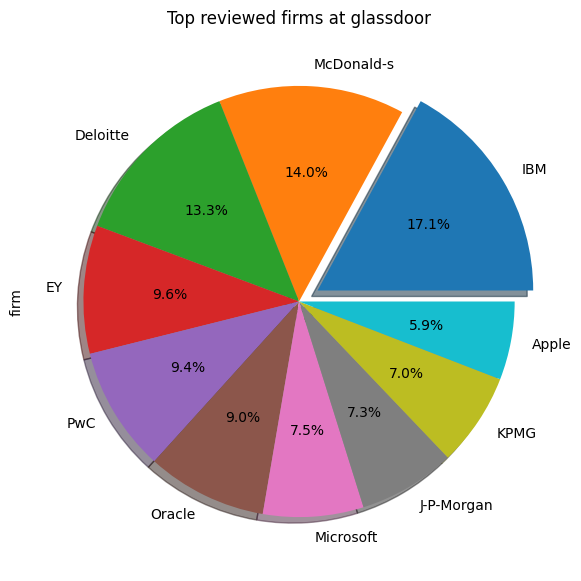

In [25]:
data_viz_df['firm'].value_counts()[:10].plot(kind = 'pie' , autopct = '%1.1f%%' , shadow = True , explode = [0.1,0,0,0,0,0,0,0,0,0])
plt.title("Top reviewed firms at glassdoor")
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

## Most common position at glassdoor ?

In [26]:
job_title_count = data_viz_df.groupby('job_title')['job_title'].count()
most_common_position = job_title_count.sort_values(ascending = False)[:10]
most_common_position

job_title
 Anonymous Employee    162649
                        79065
 Manager                14906
 Consultant             12559
 Software Engineer      10797
 Associate              10305
 Senior Consultant      10199
 Analyst                 9680
 Crew Member             7759
 Senior Associate        6764
Name: job_title, dtype: int64

<Axes: ylabel='job_title'>

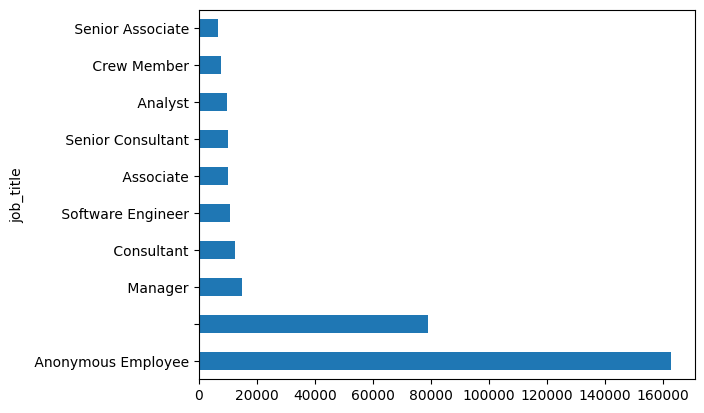

In [27]:
most_common_position.plot(kind='barh')


Second last values denotes NA positions.

In [28]:
overall_ratings_df = data_viz_df.sort_values(by = 'overall_rating',ascending = False)[:10]

In [29]:
overall_ratings_df['job_title']

date_review
2017-02-17                 Retail Sales Consultant
2020-10-27                                   Sales
2020-11-18                National Account Manager
2020-11-16                          Sales Director
2020-11-13                Senior Account Executive
2020-11-11                               Marketing
2020-11-10                      IT Product Manager
2020-11-09                       Account Executive
2020-11-06     Software Development Engineer (SDE)
2020-11-06                Senior Account Executive
Name: job_title, dtype: object

<Axes: xlabel='firm', ylabel='job_title'>

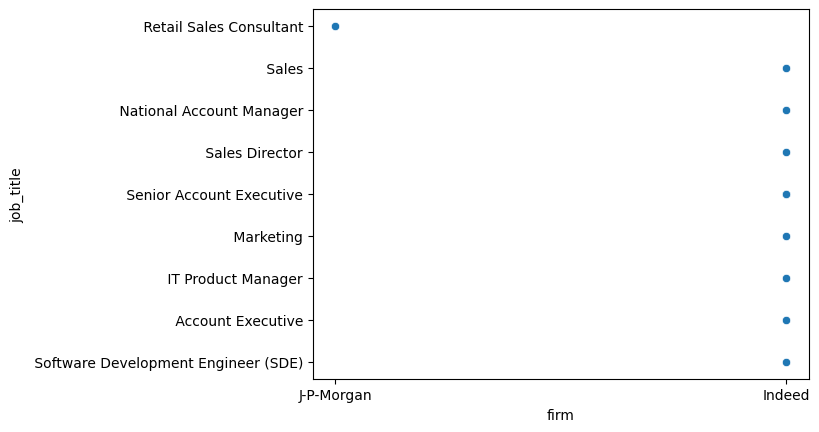

In [30]:
sns.scatterplot(x='firm', y='job_title', data=overall_ratings_df)


Retail Sales Consultant,Sales,National Account Manager,Sales Director,Senior Account Executive, Marketing,IT Product Manager,Account Executive,Software Development Engineer (SDE),Senior Account Executive are the top positions reviewed on glassdoor .

In [31]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
# After the part where 'head_len' is created
print("Columns in df:", df.columns)
if 'head_len' in df.columns:
    print("head_len exists in df")
else:
    print("head_len does not exist in df")


Columns in df: Index(['firm', 'job_title', 'current', 'location', 'overall_rating',
       'work_life_balance', 'culture_values', 'diversity_inclusion',
       'career_opp', 'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv',
       'outlook', 'headline', 'pros', 'cons'],
      dtype='object')
head_len does not exist in df


<Axes: >

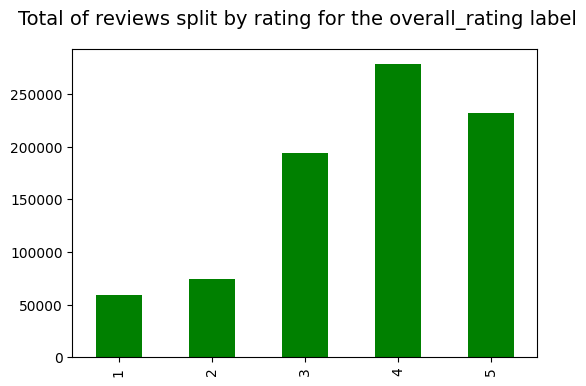

In [33]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
plt.suptitle("Total of reviews split by rating for the overall_rating label", fontsize=14)
df['overall_rating'].value_counts().sort_index(ascending=True).plot.bar(color="green")

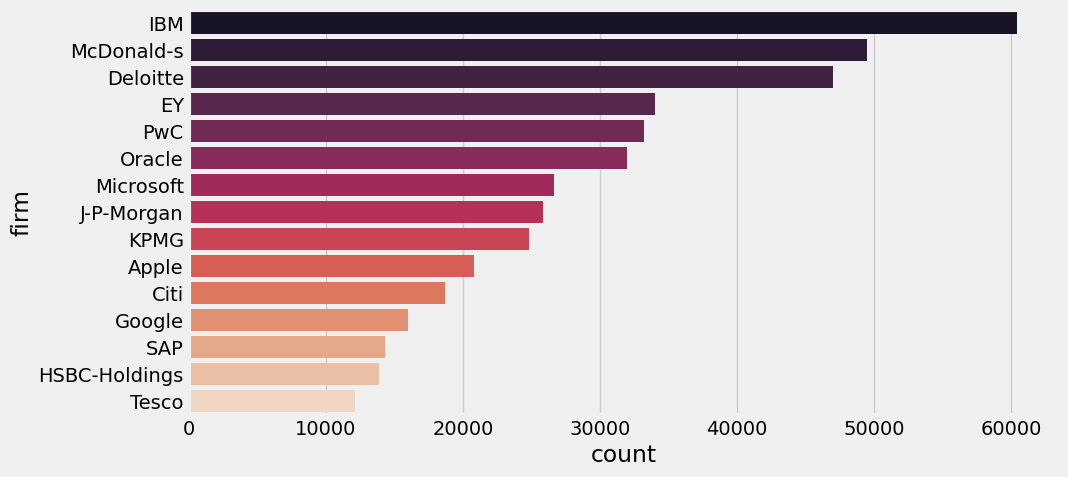

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (10 , 5))
sns.countplot(y = 'firm' , data = df , palette = 'rocket' ,
              order = df['firm'].value_counts().index[:15])
plt.show()

In [35]:
import seaborn as sns
sns.set_style('darkgrid')

<Axes: xlabel='work_life_balance', ylabel='overall_rating'>

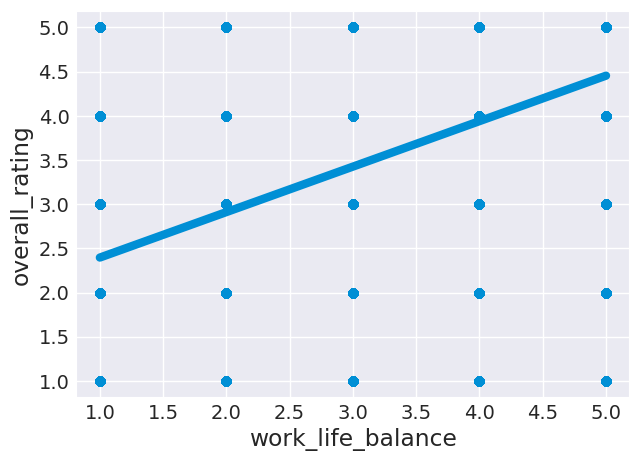

In [36]:
sns.regplot(data = df, x = 'work_life_balance', y = 'overall_rating')

<Axes: xlabel='comp_benefits', ylabel='overall_rating'>

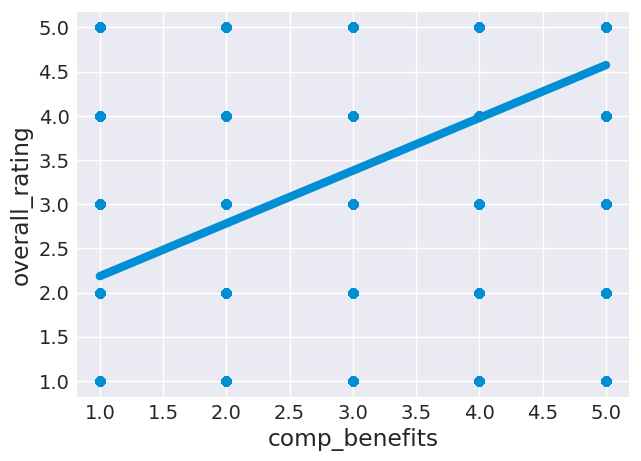

In [37]:
sns.regplot(data = df, x = 'comp_benefits', y = 'overall_rating')

<Axes: xlabel='senior_mgmt', ylabel='overall_rating'>

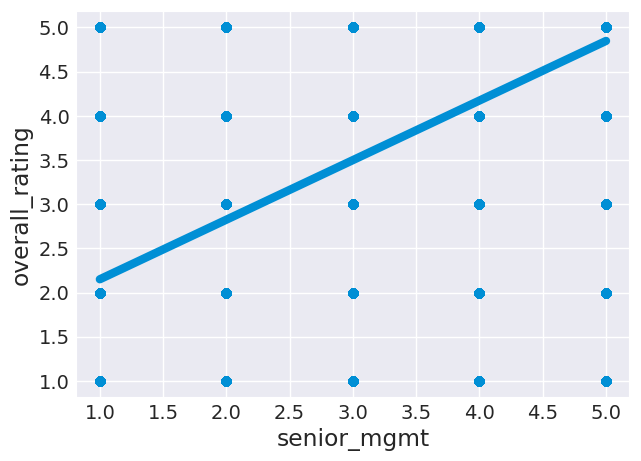

In [38]:
sns.regplot(data = df, x = 'senior_mgmt', y = 'overall_rating')

In [39]:
title = df['job_title'].value_counts()
title = title[title >5300]
title = title[title <70000]
title

 Manager              14906
 Consultant           12559
 Software Engineer    10797
 Associate            10305
 Senior Consultant    10199
 Analyst               9680
 Crew Member           7759
 Senior Associate      6764
 Cashier               5860
 Project Manager       5384
 Senior Manager        5335
 Sales Assistant       5328
Name: job_title, dtype: int64

<Axes: >

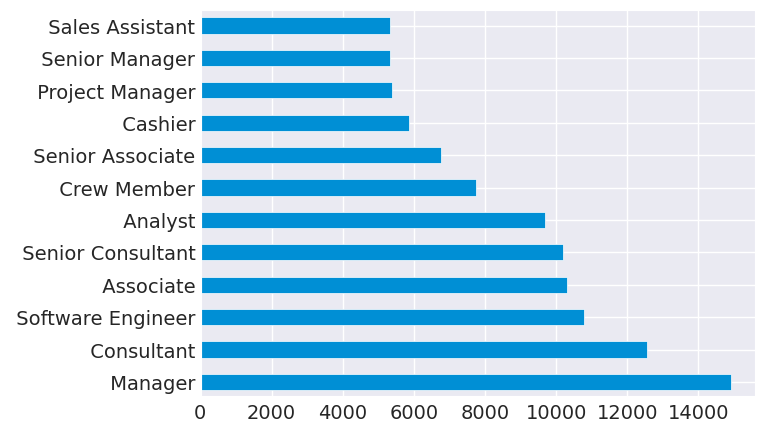

In [40]:
title.plot(kind = 'barh')

# Most Common words in Job Location

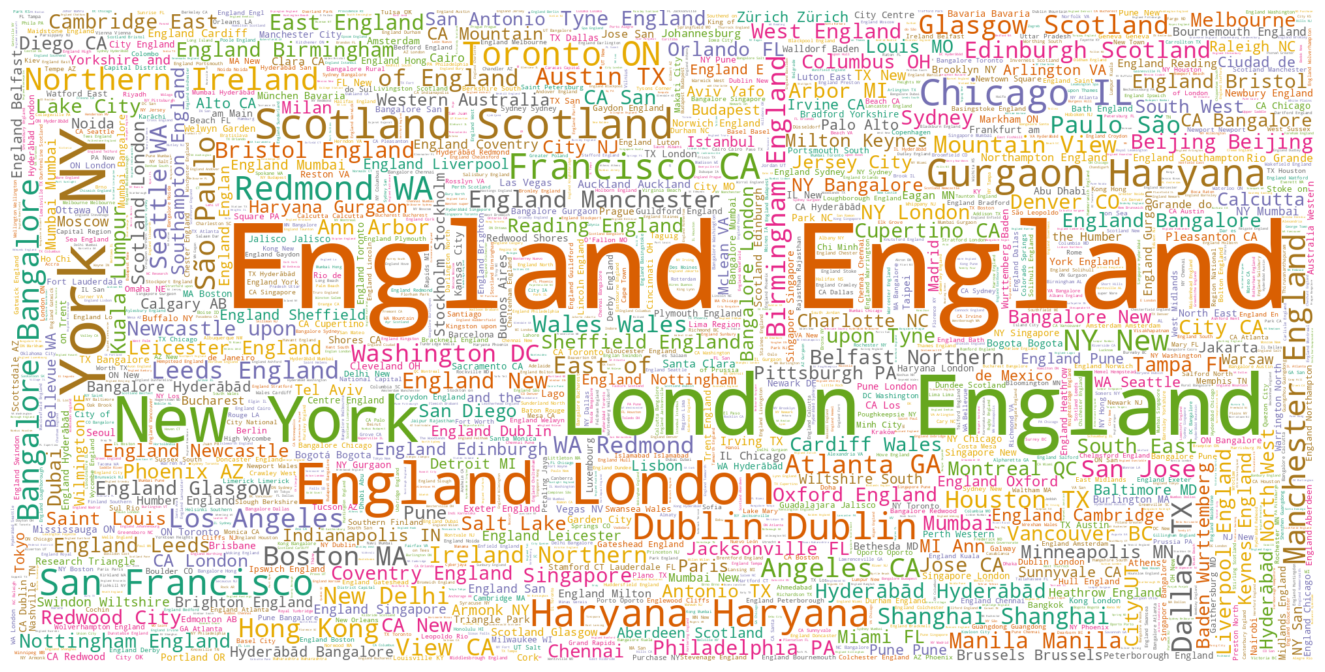

In [41]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

text = df['location']

wordcloud = WordCloud(
    background_color="white",
    max_words=2000,
    colormap='Dark2',
    height=1000,
    width=2000,stopwords = ['dtype', 'object', 'Name', 'Length',
                            'Location', 'NaN', 'Central']).generate(str(text))

plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


## Work life Balance

In [42]:
overall_ratings_df[['job_title','work_life_balance','recommend','ceo_approve','outlook']]

job_title  work_life_balance  \
date_review                                                            
2017-02-17                Retail Sales Consultant                5.0   
2020-10-27                                  Sales                5.0   
2020-11-18               National Account Manager                5.0   
2020-11-16                         Sales Director                NaN   
2020-11-13               Senior Account Executive                5.0   
2020-11-11                              Marketing                5.0   
2020-11-10                     IT Product Manager                NaN   
2020-11-09                      Account Executive                5.0   
2020-11-06    Software Development Engineer (SDE)                5.0   
2020-11-06               Senior Account Executive                5.0   

              recommend ceo_approve     outlook  
date_review                                      
2017-02-17     Positive  No opinion    Positive  
2020-10-27     Positive    Positive    Positive  
2020-11-18     Positive    Positive    Positive  
2020-11-16   No opinion  No opinion  No opinion  
2020-11-13     Positive    Positive    Positive  
2020-11-11     Positive    Positive  No opinion  
2020-11-10   No opinion  No opinion  No opinion  
2020-11-09     Positive    Positive    Positive  
2020-11-06     Positive    Positive    Positive  
2020-11-06     Positive    Positive    Positive

## Career Opportunities

In [43]:
overall_ratings_df[['job_title','career_opp','recommend','ceo_approve','outlook']]

job_title  career_opp   recommend  \
date_review                                                                 
2017-02-17                Retail Sales Consultant         5.0    Positive   
2020-10-27                                  Sales         5.0    Positive   
2020-11-18               National Account Manager         4.0    Positive   
2020-11-16                         Sales Director         NaN  No opinion   
2020-11-13               Senior Account Executive         5.0    Positive   
2020-11-11                              Marketing         4.0    Positive   
2020-11-10                     IT Product Manager         NaN  No opinion   
2020-11-09                      Account Executive         5.0    Positive   
2020-11-06    Software Development Engineer (SDE)         4.0    Positive   
2020-11-06               Senior Account Executive         5.0    Positive   

            ceo_approve     outlook  
date_review                          
2017-02-17   No opinion    Positive  
2020-10-27     Positive    Positive  
2020-11-18     Positive    Positive  
2020-11-16   No opinion  No opinion  
2020-11-13     Positive    Positive  
2020-11-11     Positive  No opinion  
2020-11-10   No opinion  No opinion  
2020-11-09     Positive    Positive  
2020-11-06     Positive    Positive  
2020-11-06     Positive    Positive

## Senior Management

In [44]:
overall_ratings_df[['job_title','senior_mgmt','recommend','ceo_approve','outlook']]

job_title  senior_mgmt   recommend  \
date_review                                                                  
2017-02-17                Retail Sales Consultant          5.0    Positive   
2020-10-27                                  Sales          4.0    Positive   
2020-11-18               National Account Manager          5.0    Positive   
2020-11-16                         Sales Director          NaN  No opinion   
2020-11-13               Senior Account Executive          5.0    Positive   
2020-11-11                              Marketing          5.0    Positive   
2020-11-10                     IT Product Manager          NaN  No opinion   
2020-11-09                      Account Executive          5.0    Positive   
2020-11-06    Software Development Engineer (SDE)          4.0    Positive   
2020-11-06               Senior Account Executive          5.0    Positive   

            ceo_approve     outlook  
date_review                          
2017-02-17   No opinion    Positive  
2020-10-27     Positive    Positive  
2020-11-18     Positive    Positive  
2020-11-16   No opinion  No opinion  
2020-11-13     Positive    Positive  
2020-11-11     Positive  No opinion  
2020-11-10   No opinion  No opinion  
2020-11-09     Positive    Positive  
2020-11-06     Positive    Positive  
2020-11-06     Positive    Positive

## Culture Values

In [45]:
overall_ratings_df[['job_title','culture_values','recommend','ceo_approve','outlook']]

job_title  culture_values   recommend  \
date_review                                                                     
2017-02-17                Retail Sales Consultant             5.0    Positive   
2020-10-27                                  Sales             5.0    Positive   
2020-11-18               National Account Manager             5.0    Positive   
2020-11-16                         Sales Director             NaN  No opinion   
2020-11-13               Senior Account Executive             5.0    Positive   
2020-11-11                              Marketing             5.0    Positive   
2020-11-10                     IT Product Manager             NaN  No opinion   
2020-11-09                      Account Executive             5.0    Positive   
2020-11-06    Software Development Engineer (SDE)             5.0    Positive   
2020-11-06               Senior Account Executive             5.0    Positive   

            ceo_approve     outlook  
date_review                          
2017-02-17   No opinion    Positive  
2020-10-27     Positive    Positive  
2020-11-18     Positive    Positive  
2020-11-16   No opinion  No opinion  
2020-11-13     Positive    Positive  
2020-11-11     Positive  No opinion  
2020-11-10   No opinion  No opinion  
2020-11-09     Positive    Positive  
2020-11-06     Positive    Positive  
2020-11-06     Positive    Positive

# Ratings and Text Reviews

In [46]:
from termcolor import colored
import gc
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.vocab import FastText, vocab
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch.nn.utils.clip_grad import clip_grad_norm_
from torch.utils.data import TensorDataset, DataLoader
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from gensim.models.phrases import Phrases, Phraser
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation
import re
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
tqdm.pandas()

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
# Load Data
data    = pd.read_csv('/content/drive/MyDrive/glassdoor_reviews.csv', sep=',', encoding='latin-1').sample(50000)
Notkeep = [d for d in data.columns if d not in ['overall_rating','headline','pros','cons','firm','date_review']]
data    = data.drop(columns=Notkeep)
data['date_review'] = pd.to_datetime(data['date_review'])

# Get column names for each types
types_str = data.select_dtypes(include='object').columns
types_int = data.select_dtypes(include=[int,float]).columns

# Fill missing according to types
data[types_str] = data[types_str].fillna('NA')
data[types_int] = SimpleImputer(strategy='mean').fit_transform(data[types_int])

# Drop Duplicates
duplicate = data[['headline','pros','cons']].duplicated()
data      = data.loc[duplicate==False]
data = data.reset_index()
print('Drop Duplicated:',duplicate.sum())

# Final frame
cols = ['overall_rating', 'headline','pros','cons']
df = data[cols]
df.fillna(' ',inplace=True)
df['headline'].astype(str)
df['pros'].astype(str)
df['cons'].astype(str)

Drop Duplicated: 127


0                         Not great incentives or benefits
1         long working hours\r\nSenior management not good
2        there is no generic commonly agreed method of ...
3        Salary not good compared to the market, being ...
4                             Hard to change your location
5        Salesforce talks about the aloha spirit and em...
6                   Nothing complaints. Everything is good
7               There are always limitations as an intern.
8        Not really usual office hours (8 to 21 + const...
9        For starters, I have been with PwC for a few m...
10       This is a big company that focuses mostly on B...
11       -retail hours\r\n-a lot of customer issues\r\n...
12       Some Sales territories have unreasonable quota...
13            Demanding hours at times, albeit as expected
14       Too much inclusion!\r\nQuite a lot of meetings...
15       very big organization, brings with it the corp...
16                          None particularly to speak o

In [49]:
# Preprocessing text routines
stemmer = WordNetLemmatizer()
tok = TreebankWordTokenizer()

nltk.download('stopwords')
en_stop       = set(nltk.corpus.stopwords.words('english'))
to_be_removed = list(en_stop) + list(punctuation)

# Preprocess text for transformers
def preprocess_transformers(document, full_process=True):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))
        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)
        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)
        # Converting to Lowercase
        document = document.lower()
        if full_process:
            # Lemmatization
            tokens = document.split()
            tokens = [stemmer.lemmatize(word) for word in tokens]
            tokens = [word for word in tokens if word not in en_stop]
            tokens = [word for word in tokens if len(word) > 3]
            document = ' '.join(tokens)
        return document

# Make phraser to detect collocations
def show_phrases(tokenized_sentences, threshold=10, shown=15):
  '''Show collocation for a corpus of tokenized sentences.'''
  phrases = Phrases(tokenized_sentences, threshold=threshold)
  i = 0
  for phrase, score in phrases.export_phrases().items():
  #for phrase, score in phrases.export_phrases(): # for other gensim version
    if i>shown:
      break
    else:
      print("Expression : {0}, score = {1}".format(phrase, score))
    i=i+1

# Accuracy function to evaluate during training
def accuracy(preds, labels):
    pred = np.argmax(preds, axis=1).flatten()
    labels = labels.flatten()
    return np.sum(pred == labels) / len(labels)

def tokenize_pad_numericalize(entry, vocab_stoi, tok, pad=True, max_length=100):
    if pad :
        text = [ vocab_stoi[token] if token in vocab_stoi else vocab_stoi[''] for token in tok.tokenize(entry)]
        padded_text = None
        l = len(text)
        if l < max_length:   padded_text = text + [ vocab_stoi[''] for i in range(len(text), max_length) ]
        elif l > max_length: padded_text = text[:max_length]
        else:                        padded_text = text
        return padded_text
    else :
        text = [ vocab_stoi[token] if token in vocab_stoi else vocab_stoi[''] for token in tok.tokenize(entry)]
        return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
pretrained_vectors = FastText(language='en')
pretrained_vocab = vocab(pretrained_vectors.stoi, min_freq=0)

unk_token = ""
unk_index = 0
pad_token = ''
pad_index = 1
pretrained_vocab.insert_token("",unk_index)
#pretrained_vocab.insert_token("",pad_index)

pretrained_vocab.set_default_index(unk_index)
pretrained_embeddings = pretrained_vectors.vectors
pretrained_embeddings = torch.cat((torch.zeros(2,pretrained_embeddings.shape[1]),pretrained_embeddings))
stoi = pretrained_vocab.get_stoi()
tok = TreebankWordTokenizer()

.vector_cache/wiki.en.vec: 6.60GB [01:18, 84.3MB/s]                            
100%|██████████| 2519370/2519370 [07:28<00:00, 5619.41it/s]


In [51]:
all_sentences = df[['headline','pros','cons']].applymap(lambda x: nltk.word_tokenize(preprocess_transformers(x, full_process=False)))
all_sentences = all_sentences.melt().value.to_list()

phrases = Phrases(all_sentences, delimiter='oo' ,threshold=100)
phraser = Phraser(phrases)

In [52]:
show_phrases(all_sentences,threshold=100)

Expression : poorly_managed, score = 212.1610177833191
Expression : short_term, score = 151.92723697148477
Expression : pizza_hut, score = 3547.502065232873
Expression : youâ_re, score = 148.459423318751
Expression : blue_chip, score = 2663.6961577350858
Expression : crew_member, score = 404.5270913724063
Expression : software_engineer, score = 215.33381436949423
Expression : micro_managed, score = 281.4194378865731
Expression : looked_after, score = 113.45292860636955
Expression : customer_service, score = 103.74429148437768
Expression : hybrid_cloud, score = 171.30937052932762
Expression : fast_paced, score = 268.837804901074
Expression : mixed_feelings, score = 1033.314470627282
Expression : stepping_stone, score = 3641.0089121887286
Expression : cost_cutting, score = 292.79993990633676
Expression : decision_making, score = 283.33726177730193


In [53]:
# We use the same function for transformers and for LSTMs
df['headline'] = df['headline'].progress_apply(lambda x : preprocess_transformers(x, full_process=False))
df['pros'] = df['pros'].progress_apply(lambda x : preprocess_transformers(x, full_process=False))
df['cons'] = df['cons'].progress_apply(lambda x : preprocess_transformers(x, full_process=False))

df['headline'] = df['headline'].progress_apply(lambda x: ' '.join(phraser[word_tokenize(x)]))
df['pros'] = df['pros'].progress_apply(lambda x: ' '.join(phraser[word_tokenize(x)]))
df['cons'] = df['cons'].progress_apply(lambda x: ' '.join(phraser[word_tokenize(x)]))

100%|██████████| 49873/49873 [00:08<00:00, 5933.99it/s]


In [54]:
pad = True
# We use different lengths for each field, because the headlines are usually much shorter than the pros and cons
df['tokenized_headline'] = df['headline'].progress_apply(lambda x : tokenize_pad_numericalize(x, stoi, tok, pad, max_length=20))
df['tokenized_pros'] = df['pros'].progress_apply(lambda x : tokenize_pad_numericalize(x, stoi, tok, pad, max_length=80))
df['tokenized_cons'] = df['cons'].progress_apply(lambda x : tokenize_pad_numericalize(x, stoi, tok, pad, max_length=100))

100%|██████████| 49873/49873 [00:05<00:00, 8599.47it/s]


In [55]:
class ReviewsDataset(Dataset):
    def __init__(self, data, args):
        self.data = data
        self.args = args
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        item = {
                'rate' : int(self.data.iloc[idx]['overall_rating'])-1, #so that all grades are between 0 and 4 instead of 1 and 5
                'headline' : torch.as_tensor(self.data.iloc[idx]['tokenized_headline']),
                'pros' : torch.as_tensor(self.data.iloc[idx]['tokenized_pros']),
                'cons' : torch.as_tensor(self.data.iloc[idx]['tokenized_cons'])
        }
        return item

# LSTM Model

In [56]:
data_train, data_test_val = train_test_split(df, test_size=0.7)
data_test, data_val = train_test_split(data_test_val,test_size=0.5)
del data_test_val

args = {'bsize': 16}

train_loader = DataLoader(ReviewsDataset(data_train, args), batch_size=args['bsize'], shuffle=True, drop_last=True)
del data_train
val_loader = DataLoader(ReviewsDataset(data_val, args), batch_size=args['bsize'], shuffle=True, drop_last=True)
del data_val
test_loader = DataLoader(ReviewsDataset(data_test, args), batch_size=args['bsize'], shuffle=True, drop_last=True)
del data_test

In [57]:
del df
del data
gc.collect()

0

In [58]:
def train(model, optimizer, ep, args):
  model.train()
  loss_it, acc_it = list(), list()
  for it, batch in tqdm(enumerate(train_loader), desc="Epoch %s:" % (ep+1), total=train_loader.__len__()):
    batch = {'headline': batch['headline'].to(device), 'pros': batch['pros'].to(device), 'cons': batch['cons'].to(device), 'rate': batch['rate'].type(torch.LongTensor).to(device)}
    optimizer.zero_grad()
    logits = model(batch['headline'], batch['pros'], batch['cons'])
    # since our dataset is unbalanced, we calculate the weights according to their inverse frequency
    b_counter = Counter(batch['rate'].detach().cpu().tolist())
    b_weights = torch.tensor( [ sum(batch['rate'].detach().cpu().tolist()) / b_counter[label] if b_counter[label] > 0 else 0 for label in list(range(5)) ] )
    b_weights = b_weights.to(device)

    loss_function = nn.CrossEntropyLoss(weight=b_weights)
    loss = loss_function(logits, batch['rate']) #.unsqueeze(1))

    loss.backward()
    optimizer.step()

    loss_it.append(loss.item())

    _, tag_seq  = torch.max(logits, 1)

    correct = (tag_seq.flatten() == batch['rate'].flatten()).float().sum()
    acc = correct / batch['rate'].flatten().size(0)
    acc_it.append(acc.item())

  loss_it_avg = sum(loss_it)/len(loss_it)
  acc_it_avg = sum(acc_it)/len(acc_it)
  print("%s : (%s %s) (%s %s)" % (colored('Training', 'blue'), colored('loss', 'cyan'), sum(loss_it)/len(loss_it), colored('acc', 'cyan'), sum(acc_it) / len(acc_it)))
  return loss_it, loss_it_avg


def inference(target, loader, model):
  model.eval()
  loss_it, acc_it, f1_it = list(), list(), list()
  preds, trues = list(), list()

  for it, batch in enumerate(loader):
    with torch.no_grad():
      batch = {'headline': batch['headline'].to(device), 'pros': batch['pros'].to(device), 'cons': batch['cons'].to(device), 'rate': batch['rate'].type(torch.LongTensor).to(device)}
      logits = model(batch['headline'], batch['pros'], batch['cons'])

      b_counter = Counter(batch['rate'].detach().cpu().tolist())
      b_weights = torch.tensor( [ sum(batch['rate'].detach().cpu().tolist()) / b_counter[label] if b_counter[label] > 0 else 0 for label in list(range(5)) ] )
      b_weights = b_weights.to(device)
      loss_function = nn.CrossEntropyLoss(weight=b_weights)
      loss = loss_function(logits, batch['rate']) #.unsqueeze(1))
      loss_it.append(loss.item())

      _, tag_seq  = torch.max(logits, 1)

      correct = (tag_seq.flatten() == batch['rate'].flatten()).float().sum()
      acc = correct / batch['rate'].flatten().size(0)
      acc_it.append(acc.item())

      preds.extend(tag_seq.cpu().detach().tolist())
      trues.extend(batch['rate'].cpu().detach().tolist())

  loss_it_avg = sum(loss_it)/len(loss_it)
  acc_it_avg = sum(acc_it)/len(acc_it)

  print("%s : (%s %s) (%s %s)" % ( colored(target, 'green'), colored('loss', 'cyan'), sum(loss_it)/len(loss_it), colored('acc', 'cyan'), sum(acc_it) / len(acc_it)))

  return trues, preds, loss_it_avg, acc_it_avg, loss_it, acc_it


def run_epochs(model, args):

  args['device'] =device
  optimizer = optim.Adam(model.parameters(), lr = args['lr'])
  val_ep_losses = list()
  val_losses = list()
  train_ep_losses = list()

  for ep in range(args['max_eps']):
    train_loss_it, train_loss_it_ep = train(model, optimizer, ep, args)
    trues, preds, val_loss_it_avg, val_acc_it_avg, val_loss_it, val_acc_it = inference("validation", val_loader, model)
    val_ep_losses.append(val_loss_it_avg)
    train_ep_losses.append(train_loss_it_ep)
    val_losses = val_losses + val_loss_it

  return val_ep_losses, val_losses, train_ep_losses

In [59]:
class LSTMModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, hidden_dim2, output_dim, batch_size, pretrained_vectors=None):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.ebd = torch.nn.Embedding.from_pretrained(pretrained_vectors, freeze=True)
        self.lstm_headline = torch.nn.LSTM(input_dim,hidden_dim, batch_first=True)
        self.lstm_pros = torch.nn.LSTM(input_dim,hidden_dim, 2, batch_first=True)
        self.lstm_cons = torch.nn.LSTM(input_dim,hidden_dim, 2, batch_first=True)
        self.softmax = torch.nn.Softmax(dim=1)
        self.relu = torch.nn.ReLU()
        self.hidden_headline = self.init_hidden() #hidden state of the lstm layer for headline text
        self.hidden_pros = self.init_hidden() #same for pros
        self.hidden_cons = self.init_hidden() #same for cons
        self.hidden_layer2 = torch.nn.Linear(hidden_dim*3, hidden_dim2)
        self.classification_layer = torch.nn.Linear(hidden_dim2, output_dim)
        self.dropout = nn.Dropout(0.25) #we add dropout to prevent overfitting


    def init_hidden(self):
        return (torch.autograd.Variable(torch.zeros(1, self.batch_size, self.hidden_dim)),
                torch.autograd.Variable(torch.zeros(1, self.batch_size, self.hidden_dim)))

    def forward(self, x_headline, x_pros, x_cons):
        h_headline  = self.ebd(x_headline)
        h_pros = self.ebd(x_pros)
        h_cons = self.ebd(x_cons)
        h_headline, self.hidden_headline = self.lstm_headline(h_headline)
        h_pros, self.hidden_pros = self.lstm_pros(h_pros)
        h_cons, self.hidden_cons = self.lstm_cons(h_cons)
        h = torch.cat((h_headline[:,-1,:], h_pros[:,-1,:], h_cons[:,-1,:]),1)
        h  = self.relu(self.hidden_layer2(h))
        h = self.dropout(h)
        h = self.classification_layer(h)
        logits = self.softmax(h)
        return logits

In [60]:
if torch.cuda.is_available():
  device = 'cuda'
  print('DEVICE = ', colored(torch.cuda.get_device_name(0), "green" ) )
else:
  device = 'cpu'
  print('DEVICE = ', colored('CPU', "blue"))

DEVICE =  CPU


In [61]:
batch_size = args['bsize']
input_dim  = 300 # fasttext embedding dimension
hidden_dim = 100
hidden_dim2 = 50
output_dim = 5 # only five possible grades

lstm_model = LSTMModel(input_dim, hidden_dim, hidden_dim2, output_dim, batch_size, pretrained_vectors=pretrained_vectors.vectors)
lstm_model.to(device)

LSTMModel(
  (ebd): Embedding(2519370, 300)
  (lstm_headline): LSTM(300, 100, batch_first=True)
  (lstm_pros): LSTM(300, 100, num_layers=2, batch_first=True)
  (lstm_cons): LSTM(300, 100, num_layers=2, batch_first=True)
  (softmax): Softmax(dim=1)
  (relu): ReLU()
  (hidden_layer2): Linear(in_features=300, out_features=50, bias=True)
  (classification_layer): Linear(in_features=50, out_features=5, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [62]:
args.update({'max_eps': 20, 'lr': 0.002, 'device': 'cuda', 'cuda': 0})
print('device', device)

loss_list_ep_val_lstm, loss_list_val_lstm, loss_list_ep_train_lstm = run_epochs(lstm_model, args)

device cpu


Epoch 1:: 100%|██████████| 935/935 [02:41<00:00,  5.80it/s]


Training : (loss 1.607393985891087) (acc 0.2600267379679144)
validation : (loss 1.5966769361801916) (acc 0.22949129239230065)


Epoch 2:: 100%|██████████| 935/935 [02:44<00:00,  5.70it/s]


Training : (loss 1.597871684773083) (acc 0.30080213903743314)
validation : (loss 1.5985546753452415) (acc 0.33146196150320806)


Epoch 3:: 100%|██████████| 935/935 [02:47<00:00,  5.57it/s]


Training : (loss 1.596855605987304) (acc 0.3268048128342246)
validation : (loss 1.596722292747113) (acc 0.33146196150320806)


Epoch 4:: 100%|██████████| 935/935 [02:31<00:00,  6.19it/s]


Training : (loss 1.597277662078327) (acc 0.3282085561497326)
validation : (loss 1.5954038300282578) (acc 0.33146196150320806)


Epoch 5:: 100%|██████████| 935/935 [02:22<00:00,  6.55it/s]


Training : (loss 1.596288707039573) (acc 0.32834224598930484)
validation : (loss 1.5958298645797506) (acc 0.33146196150320806)


Epoch 6:: 100%|██████████| 935/935 [02:26<00:00,  6.39it/s]


Training : (loss 1.595921522028306) (acc 0.31684491978609625)
validation : (loss 1.5959075846658946) (acc 0.33146196150320806)


Epoch 7:: 100%|██████████| 935/935 [02:28<00:00,  6.29it/s]


Training : (loss 1.5958560483340911) (acc 0.3221256684491979)
validation : (loss 1.5937357557464586) (acc 0.22061182401466545)


Epoch 8:: 100%|██████████| 935/935 [02:21<00:00,  6.59it/s]


Training : (loss 1.595402947211648) (acc 0.30922459893048126)
validation : (loss 1.5927943692744926) (acc 0.22874656278643446)


Epoch 9:: 100%|██████████| 935/935 [02:37<00:00,  5.93it/s]


Training : (loss 1.5778464035554365) (acc 0.31276737967914436)
validation : (loss 1.563806677061303) (acc 0.3365032080659945)


Epoch 10:: 100%|██████████| 935/935 [02:24<00:00,  6.48it/s]


Training : (loss 1.5555939759800141) (acc 0.33689839572192515)
validation : (loss 1.5595882602179412) (acc 0.34624197983501376)


Epoch 11:: 100%|██████████| 935/935 [02:22<00:00,  6.56it/s]


Training : (loss 1.5509955505636286) (acc 0.35046791443850267)
validation : (loss 1.5438877732026042) (acc 0.37557286892758934)


Epoch 12:: 100%|██████████| 935/935 [02:24<00:00,  6.49it/s]


Training : (loss 1.5375711010101645) (acc 0.3571524064171123)
validation : (loss 1.532545631025823) (acc 0.3854835013748854)


Epoch 13:: 100%|██████████| 935/935 [02:22<00:00,  6.56it/s]


Training : (loss 1.5305966832421043) (acc 0.37219251336898396)
validation : (loss 1.5635204677948922) (acc 0.27801329055912005)


Epoch 14:: 100%|██████████| 935/935 [02:25<00:00,  6.42it/s]


Training : (loss 1.5203703134455144) (acc 0.3735294117647059)
validation : (loss 1.5203852265608846) (acc 0.38869156736938587)


Epoch 15:: 100%|██████████| 935/935 [02:30<00:00,  6.20it/s]


Training : (loss 1.50786692535176) (acc 0.39538770053475936)
validation : (loss 1.5205914946896126) (acc 0.38651466544454627)


Epoch 16:: 100%|██████████| 935/935 [02:32<00:00,  6.15it/s]


Training : (loss 1.5026419612813124) (acc 0.40307486631016043)
validation : (loss 1.512785299997828) (acc 0.3742552703941338)


Epoch 17:: 100%|██████████| 935/935 [02:29<00:00,  6.27it/s]


Training : (loss 1.4906029545687098) (acc 0.4127673796791444)
validation : (loss 1.51213804862567) (acc 0.346929422548121)


Epoch 18:: 100%|██████████| 935/935 [02:28<00:00,  6.30it/s]


Training : (loss 1.4842181593339074) (acc 0.4223930481283422)
validation : (loss 1.5174037309877377) (acc 0.3714482126489459)


Epoch 19:: 100%|██████████| 935/935 [02:28<00:00,  6.29it/s]


Training : (loss 1.4781554575272422) (acc 0.42560160427807486)
validation : (loss 1.5139020034526052) (acc 0.37310953253895507)


Epoch 20:: 100%|██████████| 935/935 [02:27<00:00,  6.36it/s]


Training : (loss 1.4771374460210138) (acc 0.4243983957219251)
validation : (loss 1.5140220765997574) (acc 0.38519706691109074)


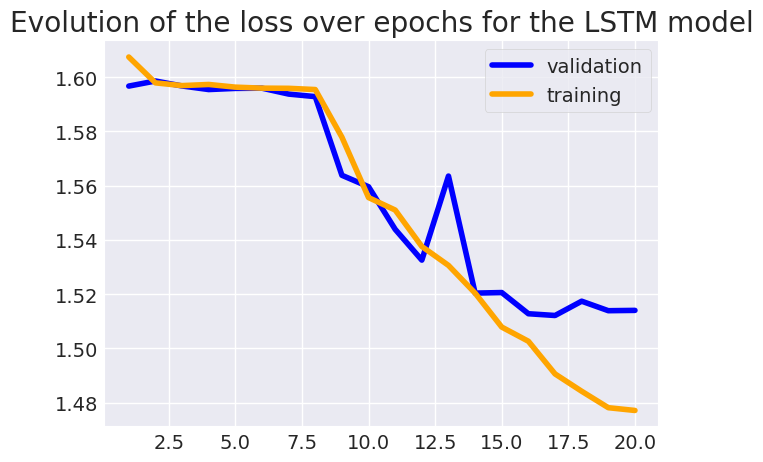

In [63]:
plt.plot(range(1,args['max_eps']+1),loss_list_ep_val_lstm, color='blue', label='validation')
plt.plot(range(1,args['max_eps']+1), loss_list_ep_train_lstm, color='orange', label='training')
plt.legend(['validation','training'])
plt.title('Evolution of the loss over epochs for the LSTM model')
plt.show()

In [64]:
import sklearn
lstm_model.eval() #swith to eval mode
trues, preds, _, _, _, _ = inference('test', test_loader, lstm_model)
print('MSE :',sklearn.metrics.mean_squared_error(trues, preds))
print('MAE :',sklearn.metrics.mean_absolute_error(trues, preds))
print('Accuracy :',sklearn.metrics.accuracy_score(trues, preds))

test : (loss 1.5074918249350528) (acc 0.3928162236480293)
MSE : 1.5747593950504124
MAE : 0.8739115490375802
Accuracy : 0.3928162236480293


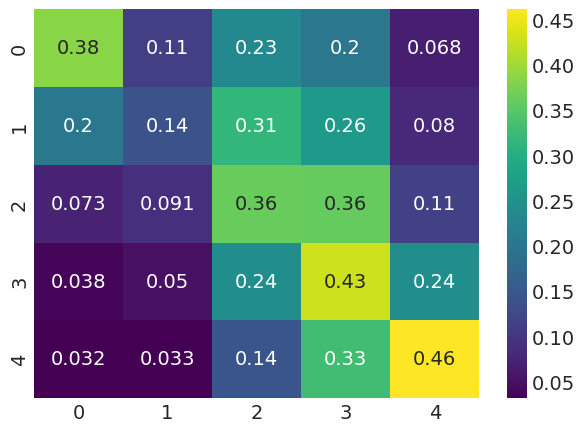

In [65]:
sns.heatmap(sklearn.metrics.confusion_matrix(trues, preds, normalize='true'), annot=True,cmap='viridis')
plt.show()